In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


# Generating dataset

In [3]:
# generating dataset

def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0,1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.2427, 1.5628]) 
label: tensor([-0.6343])


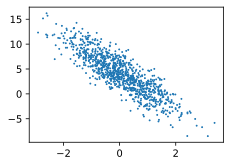

In [7]:
d2l.set_figsize()

# generating a scatter plot using the second feature and labels
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1)

# Reading the dataset

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.1058,  1.9220],
        [ 1.1304, -1.5818],
        [-0.2326, -0.6643],
        [ 0.6905, -1.2158],
        [-0.3205, -0.6566],
        [-0.0875, -2.3257],
        [-1.5460,  1.0607],
        [-0.5353, -1.0820],
        [-0.5018, -0.4468],
        [ 0.3496,  1.2060]]) 
 tensor([[-0.1241],
        [11.8408],
        [ 5.9968],
        [ 9.7064],
        [ 5.7878],
        [11.9424],
        [-2.4950],
        [ 6.8278],
        [ 4.7135],
        [ 0.7922]])


# Initializing Model parameters

In [11]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Define the Model

In [12]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

# Define the loss function

In [13]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# Defining the optimization algorithm

In [14]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# Training

In [15]:
# initialize parameters w, b
# repeat until done:
#           compute gradient g
#           update parameters w, b


In [17]:
lr = 0.03 # learning rate
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050
epoch 4, loss 0.000050
epoch 5, loss 0.000050


In [18]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 8.6188e-05, -2.7585e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)
